In [121]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules

In [122]:
df = pd.read_excel("datos.xlsx")
df

,ID,CODIGO,ITEM,CANTIDAD,MONTO SIN IVA,MONTO FINAL (INC IVA),SUCURSAL,VENDEDOR,FACTURA,FECHA EMISIÓN,RUTA
0,SER000002,RMOVISTAR,RECARGA DE MOVISTAR,1,0.8929,1.000048,CUENCA - ESTADIO,SPINOS,001-032-000187013,2023-07-01 08:07:15.468,EN RUTA
1,ITE009441,10158188,FUNDA CAMISETA PLASTICA PEQUENA YALOBOX,1,0.0002,0.000224,CUENCA - ESTADIO,SPINOS,001-032-000187014,2023-07-01 08:08:28.310,EN RUTA
2,ITE000063,040000422068,CHOCOLATE MILKYWAY 52.2GR,1,1.3392,1.499904,CUENCA - ESTADIO,SPINOS,001-032-000187014,2023-07-01 08:08:28.310,EN RUTA
3,ITE006257,759494998422,ENERGIZANTE V220 ORIGINAL 330ML,1,0.4464,0.499968,CUENCA - ESTADIO,SPINOS,001-032-000187015,2023-07-01 08:08:39.808,EN RUTA
4,ITE009441,10158188,FUNDA CAMISETA PLASTICA PEQUENA YALOBOX,1,0.0002,0.000224,CUENCA - ESTADIO,SPINOS,001-032-000187016,2023-07-01 08:21:53.010,EN RUTA
...,...,...,...,...,...,...,...,...,...,...,...
11941,ITE002312,7861024622905,BEBIDA HIDRATANTE POWERADE MANZANA CLEAR 500ML,1,0.5357,0.599984,CUENCA - ESTADIO,FGUTAMA,001-032-000187691,2023-07-04 14:50:42.016,EN RUTA
11942,ITE003542,7861068800205,CIGARRILLO LIDER POR UNIDAD,1,0.3571,0.399952,CUENCA - ESTADIO,FGUTAMA,001-032-000187692,2023-07-04 14:51:54.033,EN RUTA
11943,ITE000002,7861068800206,CIGARRILLOS LARK POR UNIDAD,1,0.3571,0.399952,CUENCA - ESTADIO,FGUTAMA,001-032-000187692,2023-07-04 14:51:54.033,EN RUTA
11944,ITE008840,1015,FUNDA CAMISETA PLASTICA GRANDE YALOBOX,1,0.0001,0.000112,CUENCA - ESTADIO,MDELEG,001-032-000193264,2023-07-31 12:21:03.896,EN RUTA


In [123]:
df.dtypes

ID                               object
CODIGO                           object
ITEM                             object
CANTIDAD                          int64
MONTO SIN IVA                   float64
MONTO FINAL (INC IVA)           float64
SUCURSAL                         object
VENDEDOR                         object
FACTURA                          object
FECHA EMISIÓN            datetime64[ns]
RUTA                             object
dtype: object

In [124]:
unique_facturas = df['ITEM'].unique()
unique_facturas_sorted = sorted(unique_facturas)
unique_facturas_sorted
df['ITEM'].unique()

array(['RECARGA DE MOVISTAR', 'FUNDA CAMISETA PLASTICA PEQUENA YALOBOX',
       'CHOCOLATE MILKYWAY 52.2GR', 'ENERGIZANTE V220 ORIGINAL 330ML',
       'FUNDA CAMISETA PLASTICA MEDIANA YALOBOX',
       'YOGURT TONI MIX FRUTI BOLITAS FRBO 180G',
       'YOGURT TONI MIX FRUTILLA 180GR',
       'CAFE CAFFE LATO MOCACCINO 250CM3 TETRAPACK',
       'TRIDENT SURTIDO POR UNIDAD ', 'CIGARRILLO LIDER POR UNIDAD',
       'TARJETA DE PARQUEO SERT EMOV',
       'CAJA  DE FOSFORO EL GALLO POR UNIDAD',
       'TOALLAS HIGENICAS NOSOTRAS DIARIOS X 15U',
       'BIRI BIRI COOKIES & CREAM 80G', 'COLA FANTA NARANJA 400ML',
       'DORITO MEGA QUESO 45GR', 'CHICLE TRIDENT MORA AZUL 5S 8.5GR',
       'JUGO DEL VALLE DURAZNO 250ML TETRAPACK',
       'GALLETA AMOR WAFER PEKES CON LECHE NESTLE 22.5G',
       'CHICLE TRIDENT MENTA SUAVE 5.1GR',
       'CAKE INACAKE EN REBANADAS VAINILLA 80G',
       'SNACK DORITO LEMON REMIX  45GR', 'YOGURT TONI MIX VABO 180G',
       'HABA MANIHABS SAL 32 GR', 'YOGURT TONI MI

In [125]:
df_resumen = df[["FACTURA", "ID"]]
valores_a_eliminar = ['ITE006712', 'ITE008840', 'ITE009441', ('ITE006712', 'ITE008840')]
df_resumen= df_resumen[~df_resumen['ID'].isin(valores_a_eliminar)]
df_resumen["contador"]=1
# Contar el número de productos por factura
factura_counts = df_resumen.groupby('FACTURA')['ID'].count()
# Filtrar las facturas con al menos 10 productos
facturas_con_n_productos_o_mas = factura_counts[factura_counts >= 1].index
facturas_con_n_productos_o_mas
# # Aplicar el filtro al DataFrame original
# df_filtrado = df_resumen[df_resumen['FACTURA'].isin(facturas_con_n_productos_o_mas)]
# df_filtrado

Index(['001-032-000187013', '001-032-000187014', '001-032-000187015',
       '001-032-000187016', '001-032-000187017', '001-032-000187018',
       '001-032-000187019', '001-032-000187020', '001-032-000187021',
       '001-032-000187022',
       ...
       '001-032-000193340', '001-032-000193341', '001-032-000193342',
       '001-032-000193343', '001-032-000193344', '001-032-000193345',
       '001-032-000193346', '001-032-000193347', '001-032-000193348',
       '001-032-000193349'],
      dtype='object', name='FACTURA', length=6326)

In [126]:
pivot_df = df_filtrado.pivot_table(index="FACTURA", columns="ID", values="contador", aggfunc="min", fill_value=0)
pivot_df.head()

ID,ITE000002,ITE000028,ITE000029,ITE000033,ITE000037,ITE000376,ITE000382,ITE000423,ITE000866,ITE000868,...,ITE010688,ITE011031,ITE011722,ITE011910,ITE011946,ITE012126,ITE012314,ITE012383,SER000001,SER000002
FACTURA,,,,,,,,,,,,,,,,,,,,,
001-032-000187013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
001-032-000187015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001-032-000187017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001-032-000187018,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001-032-000187019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
freq_items = apriori(pivot_df, min_support=0.1, use_colnames=True, verbose=1)
freq_items.head(7)

/Users/mateoherasvera/Library/CloudStorage/OneDrive-Personal/GitHub/Relaciones-productos/env/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.136962,(ITE000382)


In [128]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [129]:
valores_filtrar = ['ITE006712', 'ITE008840', 'ITE009441', 'ITE006712, ITE008840']
df[df['ID'].isin(valores_filtrar)]['ITEM'].unique()

array(['FUNDA CAMISETA PLASTICA PEQUENA YALOBOX',
       'FUNDA CAMISETA PLASTICA MEDIANA YALOBOX',
       'FUNDA CAMISETA PLASTICA GRANDE YALOBOX'], dtype=object)

# Filtrado por productos

In [130]:
df_resumenv2 = df[["FACTURA", "ID"]]
valores_a_eliminar = ['ITE006712', 'ITE008840', 'ITE009441', ('ITE006712', 'ITE008840')]
df_resumenv2= df_resumenv2[~df_resumenv2['ID'].isin(valores_a_eliminar)]
df_resumenv2["contador"]=1


In [146]:

# Contar el número de productos por factura
productos_counts = df_resumenv2.groupby('ID')['FACTURA'].count()
productos_counts

# Filtrar las facturas con al menos 10 productos
productos_con_n_cantidad = productos_counts[(productos_counts >= 50) & (productos_counts <= 540)].index


# Aplicar el filtro al DataFrame original
df_filtrado = df_resumenv2[df_resumenv2['ID'].isin(productos_con_n_cantidad)]
df_filtrado

,FACTURA,ID,contador
3,001-032-000187015,ITE006257,1
9,001-032-000187017,ITE004074,1
10,001-032-000187017,ITE003542,1
12,001-032-000187019,ITE002150,1
42,001-032-000187028,ITE000423,1
...,...,...,...
11926,001-032-000193340,ITE000423,1
11927,001-032-000193340,ITE003542,1
11932,001-032-000193344,ITE010420,1
11942,001-032-000187692,ITE003542,1


In [147]:
pivot_dfv2 = df_filtrado.pivot_table(index="FACTURA", columns="ID", values="contador", aggfunc="min", fill_value=0)
print(pivot_dfv2.shape)
freq_items = apriori(pivot_dfv2, min_support=0.1, use_colnames=True, verbose=1)
freq_items.head(7)

(2199, 28)
Processing 6 combinations | Sampling itemset size 2


/Users/mateoherasvera/Library/CloudStorage/OneDrive-Personal/GitHub/Relaciones-productos/env/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102774,(ITE000423)
1,0.112779,(ITE003542)
2,0.115052,(ITE004074)


In [148]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [141]:
valores_filtrar = ['ITE000382','ITE000423','ITE003542','ITE004074']
df[df['ID'].isin(valores_filtrar)]['ITEM'].unique()

array(['TRIDENT SURTIDO POR UNIDAD ', 'CIGARRILLO LIDER POR UNIDAD',
       'TARJETA DE PARQUEO SERT EMOV',
       'CARAMELO HALLS SURTIDO POR UNIDAD 3GR'], dtype=object)

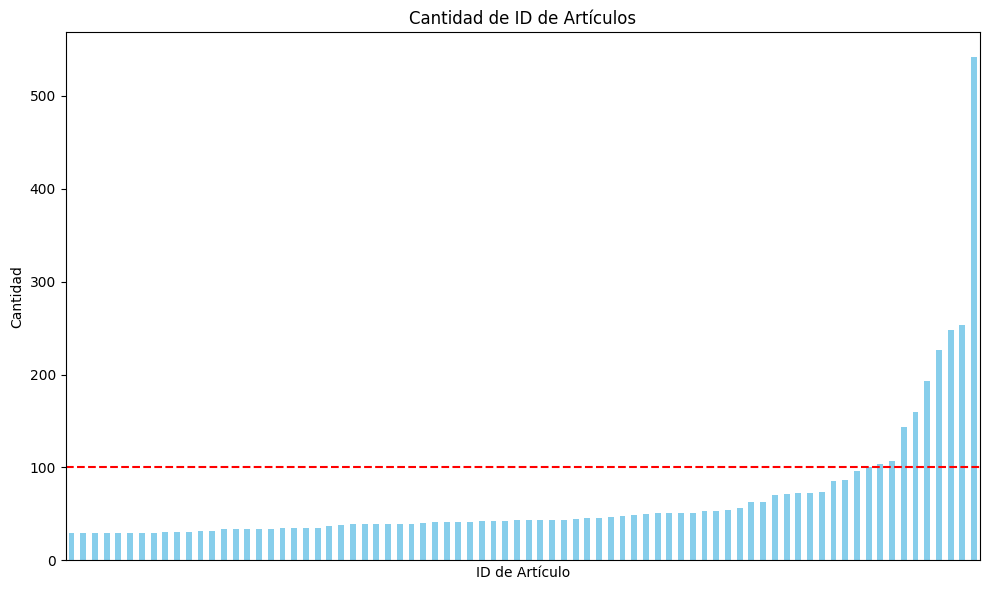

In [117]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

# Agrupar por ID y contar la cantidad de ocurrencias
grouped = df_filtrado.groupby('ID')['contador'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
grouped.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('ID de Artículo')
plt.ylabel('Cantidad')
plt.title('Cantidad de ID de Artículos')
plt.axhline(y=100, color='red', linestyle='--', label='Línea en x=25')
# Ocultar los ticks del eje x
plt.xticks([])


# Mostrar la gráfica
plt.tight_layout()
plt.show()